In [13]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
tokens_to_ignore = ["'s", "'ve", "....", "...", "..", "also", "``", "u", "''", "'ll", "'d", "--", "'m",
                   "could", "would"]

In [3]:
reviews = pd.read_csv("reviews_with_tokens.csv")
reviews = reviews.dropna(subset=["tokens", "tokens_with_negation"])

/var/folders/sx/5y812tj93qvbxkbmjcc6jjk80000gn/T/ipykernel_63077/460780110.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.read_csv("reviews_with_tokens.csv")


In [4]:
def get_all_unigrams(df):
    return ",".join(df["tokens"].values).split(",")

In [32]:
def get_sorted_words_and_counts(tokens, tokens_to_ignore=tokens_to_ignore):
    word_freqs = {}
    for token in tokens:
        if token not in word_freqs:
            word_freqs[token] = 0
        word_freqs[token] += 1
        
    words_and_counts = list(zip(word_freqs.keys(), word_freqs.values()))
    sorted_words_and_counts = sorted(words_and_counts, key = lambda x: x[1], reverse = True)
        
    return sorted_words_and_counts

In [33]:
def get_top_k_tokens_and_counts(tokens, k):
    return [(token, count) for (token, count) in 
            get_sorted_words_and_counts(tokens) 
            if token not in tokens_to_ignore][:k]

In [8]:
unigrams = get_all_unigrams(reviews)

# Frequencies of top 20 words

In [34]:
top_tokens_and_counts = get_top_k_tokens_and_counts(unigrams, 25)

In [35]:
tokens = [token for (token, count) in top_tokens_and_counts]
counts = [count for (token, count) in top_tokens_and_counts]

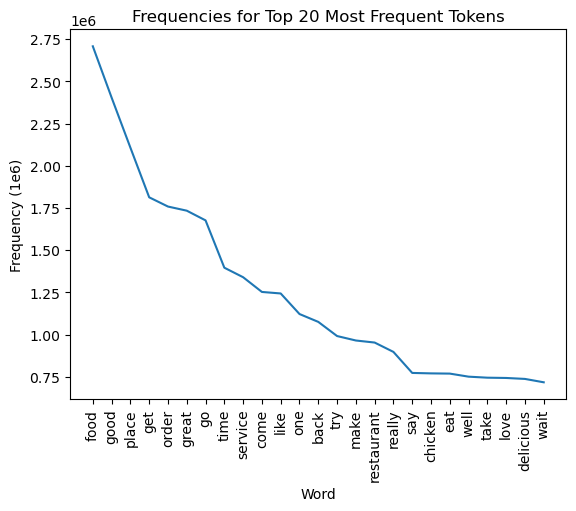

In [36]:
plt.plot(tokens, counts)
plt.xticks(rotation="vertical")
plt.xlabel("Word")
plt.ylabel("Frequency (1e6)")
plt.title("Frequencies for Top 20 Most Frequent Tokens")
plt.show()

# Count of Word Frequencies

In [66]:
words_and_counts = get_sorted_words_and_counts(unigrams)
word_frequency_by_count = {}
for (_, count) in words_and_counts:
    if not count in word_frequency_by_count:
        word_frequency_by_count[count] = 0
    word_frequency_by_count[count] += 1

freqs_and_counts = list(zip(word_frequency_by_count.keys(), word_frequency_by_count.values()))
sorted_freqs_and_counts = sorted(freqs_and_counts, key = lambda x: x[0], reverse = False)

In [109]:
def plot_for_k_frequencies(k):
    filtered_freqs_and_counts = sorted_freqs_and_counts[:k]
    freqs = [freq for (freq, count) in filtered_freqs_and_counts]
    counts = [count for (freq, count) in filtered_freqs_and_counts]

    plt.plot(freqs, counts)
    plt.xlabel("Word Frequency")
    plt.ylabel("Count")
    plt.title("Number of Words by Word Frequency")
    plt.show()    

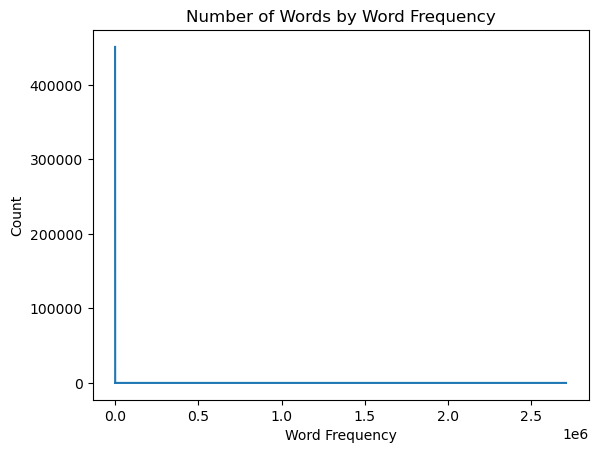

In [110]:
plot_for_k_frequencies(len(sorted_freqs_and_counts))

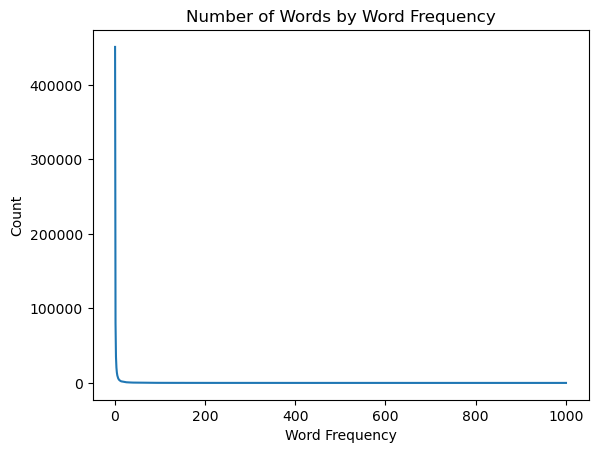

In [111]:
plot_for_k_frequencies(998)

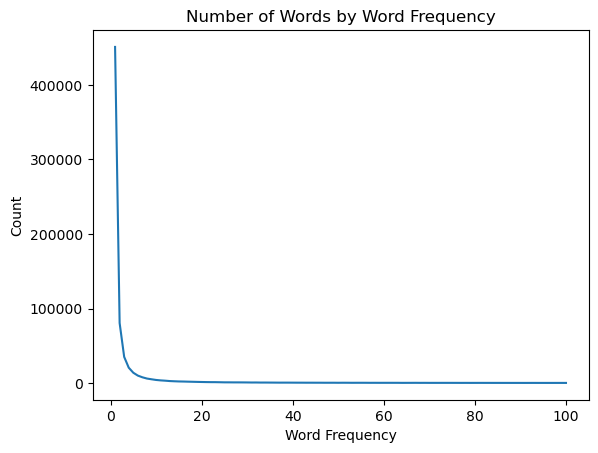

In [112]:
plot_for_k_frequencies(100)

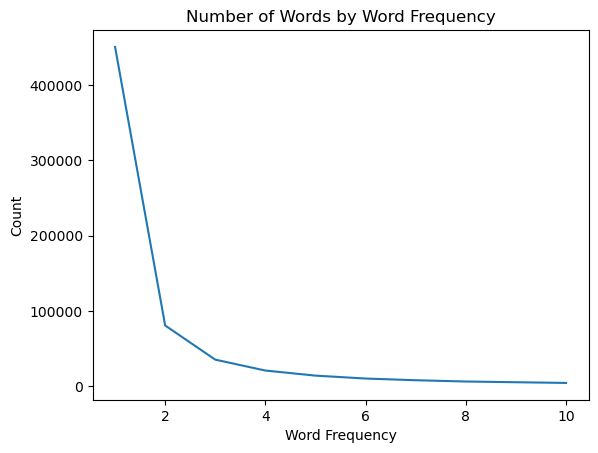

In [113]:
plot_for_k_frequencies(10)

# Count of Review Lengths

In [117]:
def review_count(review):
    return len(review.text)
    
reviews['review_count'] = reviews.apply(review_count, axis = 1)

In [120]:
count_by_sentence_length = {}

for count in reviews.review_count:
    if not count in count_by_sentence_length:
        count_by_sentence_length[count] = 0
    count_by_sentence_length[count] += 1

review_lengths_and_counts = list(zip(count_by_sentence_length.keys(), count_by_sentence_length.values()))
sorted_review_lengths_and_counts = sorted(review_lengths_and_counts, key = lambda x: x[0], reverse = False)

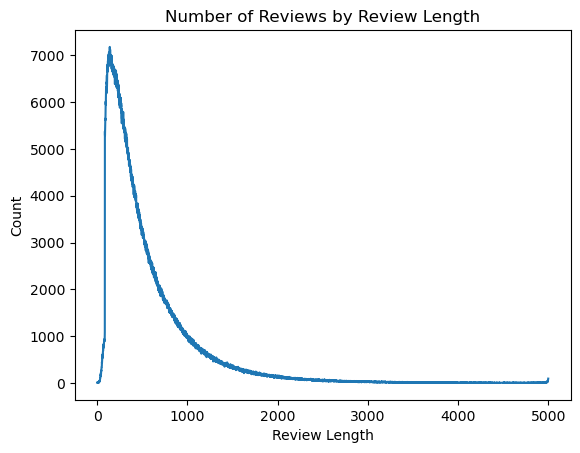

In [121]:
review_lengths = [review_len for (review_len, _) in sorted_review_lengths_and_counts]
counts = [count for (_, count) in sorted_review_lengths_and_counts]

plt.plot(review_lengths, counts)
plt.xlabel("Review Length")
plt.ylabel("Count")
plt.title("Number of Reviews by Review Length")
plt.show()    